
# Summer 2022 Data Science Intern Challenge 

### Question 1
**On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**

In [35]:
import pandas as pd # load library
import matplotlib.pyplot as plt # visualize package
df = pd.read_csv("data.csv", index_col="order_id") # load data

print(f"Number of sneakers shops :{df['shop_id'].nunique()}")
print(f"Average order value (AOV) of thee sneaker shops is {round(df['order_amount'].sum()/len(df), 2)}")
df.head() # view first 5 entries of dataset

Number of sneakers shops :100
Average order value (AOV) of thee sneaker shops is 3145.13


,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 4:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 4:35:11


***Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.***
> The value of order_amount as visualized by the box plot below shows the reason behind the wrong calculation. By calculating the quantile of the order amount, we can see 98% of the sneaker sold were below $800. Both order amount and total items features are correlated meaning high amount equals high number of sneakers sold. From the graph, the sneakers sold in bulk are outliers that skew up the average in this dataset.   
> A better way to evaluate this data for sneaker shops owner is to consider all three measures of central tendency - mean, median and mode. We can also categorize shops into bulk sellers and not bulk sellers.

Order amount and total items has 0.99% correlation
98% of the order amount is below $800.08


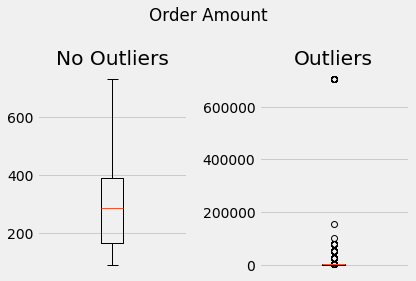

In [131]:
print(f"Order amount and total items has {round(df['order_amount'].corr(df['total_items']), 2)}% correlation")
print(f"98% of the order amount is below ${round(df['order_amount'].quantile(.98), 2)}")
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['order_amount'], showfliers=False)
ax[0].set_title("No Outliers")
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(df['order_amount'], showfliers=True)
ax[1].set_title("Outliers")
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount')
fig.tight_layout()
plt.show()

***What metric would you report for this dataset?***
> I would look at the most frequently occurring order value i.e. modal order value to increase the overall revenue. 

***What is its value?***
> Modal order value is $153

In [148]:
df['order_amount'].mode().tolist()

[153]

 ### Question 2
 **For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**


***How many orders were shipped by Speedy Express in total?***
> 54

In [ ]:
SELECT COUNT(*) as total_shipment_speedexpress
FROM Shippers as s
LEFT JOIN Orders as o
ON s.ShipperID = o.ShipperID
WHERE ShipperName = "Speedy Express"

***What is the last name of the employee with the most orders?***
> Peacock	40

In [ ]:
SELECT e.LastName, COUNT(DISTINCT o.OrderID) as num_of_orders
FROM Employees as e
LEFT JOIN Orders as o
ON e.EmployeeID = o.EmployeeID
GROUP BY e.EmployeeID
ORDER BY num_of_orders DESC
LIMIT 1


**What product was ordered the most by customers in Germany?**
> Boston Crab Meat 160

In [ ]:
SELECT p.ProductName, od.OrderID, SUM(od.Quantity) as Total_Quantity, o.CustomerID, c.Country
FROM Products as p
LEFT JOIN OrderDetails as od
ON p.ProductID = od.ProductID
LEFT JOIN Orders as o
ON od.OrderID = o.OrderID
LEFT JOIN Customers as c
ON o.CustomerID = c.CustomerID
WHERE c.Country = "Germany"
GROUP BY p.ProductName
ORDER BY Total_Quantity DESC
LIMIT 1